In [1]:
# Calling libraries:
from __future__ import division
%matplotlib inline
import numpy as np, time, matplotlib.pyplot as plt, numpy.random as npr, pystan as ps, pickle
from pylab import plot, show, legend
from time import time
from scipy.stats import *
from tqdm import trange
from functions import *
#import statsmodels.api as sm
import multiprocessing
import arviz as az
import pathlib
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
#multiprocessing.set_start_method("fork")

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


#### Compile Stan model:

In [2]:
sm = ps.StanModel(file="model_binaryAR.stan")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9b9d3a3601f9a90c225c8eef68304f39 NOW.
In file included from /var/folders/vm/bnpn0t152gn54b0_nhp78xf40000gp/T/pystan_ad219au6/stanfit4anon_model_9b9d3a3601f9a90c225c8eef68304f39_633410897044340699.cpp:771:
In file included from /opt/anaconda3/lib/python3.9/site-packages/numpy/core/include/numpy/arrayobject.h:5:
In file included from /opt/anaconda3/lib/python3.9/site-packages/numpy/core/include/numpy/ndarrayobject.h:12:
In file included from /opt/anaconda3/lib/python3.9/site-packages/numpy/core/include/numpy/ndarraytypes.h:1960:
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: "Using deprecated NumPy API, disable it with "          "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-W#warnings]
#warning "Using deprecated NumPy API, disable it with " \
 ^
In file included from /var/folders/vm/bnpn0t152gn54b0_nhp78xf40000gp/T/pystan_ad219au6/stanfit4anon_model_9b9d3a3601f9a9

In file included from /var/folders/vm/bnpn0t152gn54b0_nhp78xf40000gp/T/pystan_ad219au6/stanfit4anon_model_9b9d3a3601f9a90c225c8eef68304f39_633410897044340699.cpp:780:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/src/Core/AssignEvaluator.h:86:63: warning: 

In file included from /var/folders/vm/bnpn0t152gn54b0_nhp78xf40000gp/T/pystan_ad219au6/stanfit4anon_model_9b9d3a3601f9a90c225c8eef68304f39_633410897044340699.cpp:781:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan_fit.hpp:15:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/boost_1.69.0/boost/random/additive_combine.hpp:27:
/opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/boost_1.69.0/boost/random/linear_congruential.hpp:140:20: warning: overlapping comparisons always evaluate to false [-Wtautological-overlap-compare]
        if(_x <= 0 && _x != 0) {
           ~~~~~~~~^~~~~~~~~~
/opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/boost_1.69.0/boost/random/linear_congruential.hpp:393:11: note: in instantiation of member function 'boost::random::linear_congruential_engine<unsigned long long, 25214903917, 11, 281474976710656>::seed' requested here
    { lcf.seed(cnv(x0

In file included from /var/folders/vm/bnpn0t152gn54b0_nhp78xf40000gp/T/pystan_ad219au6/stanfit4anon_model_9b9d3a3601f9a90c225c8eef68304f39_633410897044340699.cpp:780:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/src/Core/AssignEvaluator.h:86:63: warning: 

In file included from /var/folders/vm/bnpn0t152gn54b0_nhp78xf40000gp/T/pystan_ad219au6/stanfit4anon_model_9b9d3a3601f9a90c225c8eef68304f39_633410897044340699.cpp:780:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/src/Core/AssignEvaluator.h:86:63: warning: 

In file included from /var/folders/vm/bnpn0t152gn54b0_nhp78xf40000gp/T/pystan_ad219au6/stanfit4anon_model_9b9d3a3601f9a90c225c8eef68304f39_633410897044340699.cpp:780:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/src/Core/AssignEvaluator.h:86:63: warning: 

In file included from /var/folders/vm/bnpn0t152gn54b0_nhp78xf40000gp/T/pystan_ad219au6/stanfit4anon_model_9b9d3a3601f9a90c225c8eef68304f39_633410897044340699.cpp:780:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/src/Core/AssignEvaluator.h:86:63: warning: 

In file included from /var/folders/vm/bnpn0t152gn54b0_nhp78xf40000gp/T/pystan_ad219au6/stanfit4anon_model_9b9d3a3601f9a90c225c8eef68304f39_633410897044340699.cpp:780:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/src/Core/AssignEvaluator.h:86:63: warning: 

In file included from /var/folders/vm/bnpn0t152gn54b0_nhp78xf40000gp/T/pystan_ad219au6/stanfit4anon_model_9b9d3a3601f9a90c225c8eef68304f39_633410897044340699.cpp:780:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/src/Core/AssignEvaluator.h:86:63: warning: 

In file included from /var/folders/vm/bnpn0t152gn54b0_nhp78xf40000gp/T/pystan_ad219au6/stanfit4anon_model_9b9d3a3601f9a90c225c8eef68304f39_633410897044340699.cpp:780:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/src/Core/AssignEvaluator.h:86:63: warning: 

In file included from /var/folders/vm/bnpn0t152gn54b0_nhp78xf40000gp/T/pystan_ad219au6/stanfit4anon_model_9b9d3a3601f9a90c225c8eef68304f39_633410897044340699.cpp:780:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/py_var_context.hpp:12:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/opt/anaconda3/lib/python3.9/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/src/Core/AssignEvaluator.h:86:63: warning: 

155 warnings generated.


#### Specify parameters:

In [3]:
import random
p = 5
T = 200_000 
alph = np.array([.25] * (p // 2) + [0.25] + [.25] * (p // 2)) if p % 2 != 0 else np.array([.25] * (p // 2) + [.25] * (p // 2))
prob = np.zeros(T)
c = -0.1
q = 5
#b = npr.randn(q)
b = np.array([.5] * (q // 2) + [0] + [-.5] * (q // 2)) if q % 2 != 0 else np.array([.5] * (q // 2) + [-.5] * (q // 2))
random.seed(190)

In [4]:
alph, b

(array([0.25, 0.25, 0.25, 0.25, 0.25]), array([ 0.5,  0.5,  0. , -0.5, -0.5]))

#### Generate and plot covariates:

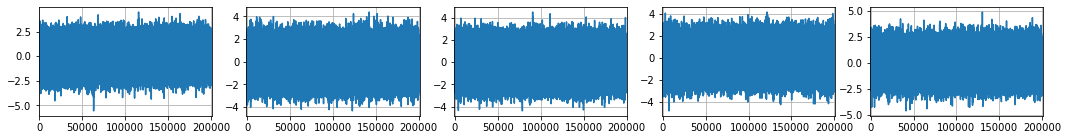

In [5]:
X = generate_X(T, q)

f = plt.figure(figsize=(18,2))
for i in range(q) :
    plt.subplot(1,q,i+1)
    plt.plot(X[:,i])
    plt.xlim(-0.005*T,1.005*T)
    plt.grid(True)

#### Generate and plot observations:

In [6]:
y = np.zeros(T).astype(int)
prob = np.zeros(T)

for t in range(p) :
    prob[t] = 1/(1+np.exp(-(c+X[t].dot(b)))) 
    y[t] = npr.binomial(n=1,p=prob[t],size=1)
for t in np.arange(p+1,T) :
    prob[t] = 1/(1+np.exp(-(c+alph.dot(y[(t-p):t])+X[t].dot(b)))) 
    y[t] = npr.binomial(n=1,p=prob[t],size=1)

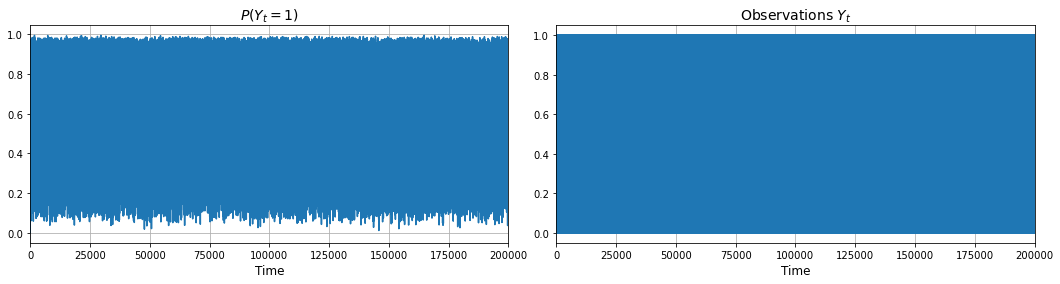

In [7]:
fig = plt.figure(figsize=(18,4))
plt.subplot(121)
plt.plot(prob)
plt.xlim(0,T)
plt.grid(True)
plt.title(r"$P(Y_t=1)$", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.subplot(122)
plt.plot(y)
plt.xlim(0,T)
plt.grid(True)
plt.title(r"Observations $Y_t$", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.subplots_adjust(wspace=1e-1)

fig.savefig('binary_AR_data.pdf', bbox_inches='tight', dpi=500)

In [8]:
def cal_ess(prob):
    samp_dict = {'prob' : prob}
    data = az.from_dict(posterior=samp_dict)
    ess = az.ess(data)
    return ess['prob'].data

In [9]:
cal_ess(prob)

array(97939.34878352)

In [10]:
len(prob)

200000

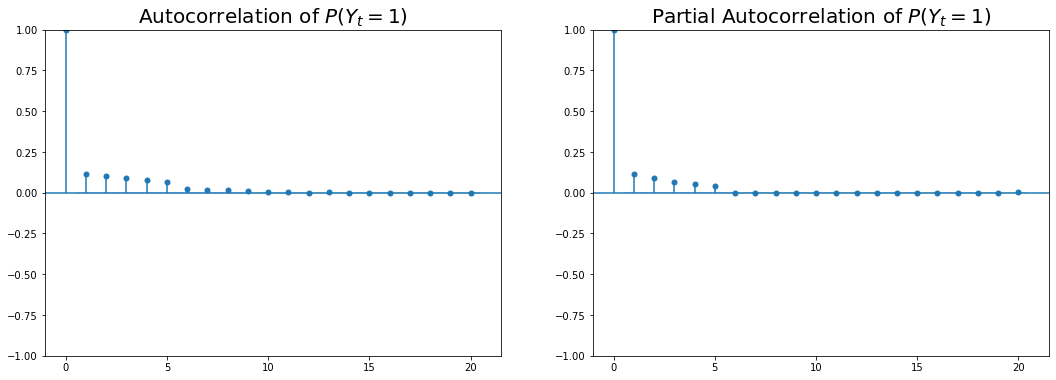

In [21]:
import statsmodels.api as stm
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot ACF on the first subplot
plot_acf(prob, lags=20, ax = axes[0])
plot_pacf(prob, lags=20, ax = axes[1], method='ywm')
axes[0].set_title('Autocorrelation of $P(Y_t=1)$', fontsize = 20)
axes[1].set_title('Partial Autocorrelation of $P(Y_t=1)$', fontsize=20)
plt.show()
fig.savefig('exp_binary_sigmasq_acf_pacf.pdf', bbox_inches='tight', dpi=2000)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


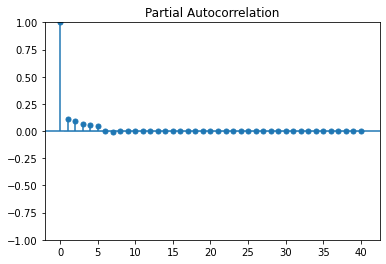

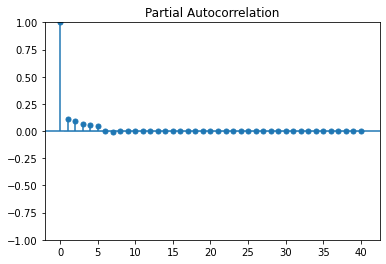

In [12]:
stm.graphics.tsa.plot_pacf(prob, lags=40)

#### Save data in file:

In [13]:
dat = dict(y=y, X=X, prob=prob, alpha=alph, b=b, c=c)
file = open("data.pkl", "wb")
pickle.dump(dat, file)
file.close()

In [14]:
print(np.mean(prob))
print([np.mean(y[i*1000:(i+1)*1000]) for i in range(10)])

0.6386202010014516
[0.619, 0.641, 0.651, 0.652, 0.652, 0.65, 0.642, 0.628, 0.661, 0.643]


### MCMC on full dataset:

In [15]:
n_chains = 1
n_iter = 1000
tstart, tend = 0, T
data = dict(T=tend-tstart, p=p, q=q, y=y[tstart:tend], X=X[tstart:tend,:], power=1)
start = time()
fit = sm.sampling(data=data, thin=1, n_jobs = min(10,n_chains), chains=n_chains, init="random", iter=n_iter)
mle = sm.optimizing(data=data)
print(round((time()-start)/60,2), "minutes to run")
trace = fit.extract()

file = open("full_mcmc.pkl", "wb")
pickle.dump(trace, file)
file.close()
file = open("full_mle.pkl", "wb")
pickle.dump(mle, file)
file.close()


Gradient evaluation took 0.246983 seconds
1000 transitions using 10 leapfrog steps per transition would take 2469.83 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration: 300 / 1000 [ 30%]  (Warmup)
Iteration: 400 / 1000 [ 40%]  (Warmup)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 700 / 1000 [ 70%]  (Sampling)
Iteration: 800 / 1000 [ 80%]  (Sampling)
Iteration: 900 / 1000 [ 90%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 1579.51 seconds (Warm-up)
               1562.19 seconds (Sampling)
               3141.7 seconds (Total)

Initial log joint probability = -808955
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
52.29      19       -112094    0.00467663       44.9732           1           1       23   
    I

### Divide-and-conquer

In [16]:
m = 10
tstarts = np.arange(m).astype(int)
tends = 1 + tstarts
tstarts *= int(T/m)
tends *= int(T/m)

In [17]:
for i in range(m) :
    tstart, tend = tstarts[i], tends[i]
    data = dict(T=tend-tstart, p=p, q=q, y=y[tstart:tend], X=X[tstart:tend,:], power=T/(tend-tstart))
    fit = sm.sampling(data=data, thin=1, n_jobs=min(10,n_chains), chains=n_chains, init="random", iter=n_iter)
    trace = fit.extract()
    file = open("mcmc_wb_chunk"+str(i+1)+".pkl", "wb")
    pickle.dump(trace, file)
    file.close()
    mle = sm.optimizing(data=data)
    file = open("mle_chunk"+str(i+1)+".pkl", "wb")
    pickle.dump(mle, file)
    file.close()


Gradient evaluation took 0.019726 seconds
1000 transitions using 10 leapfrog steps per transition would take 197.26 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration: 300 / 1000 [ 30%]  (Warmup)
Iteration: 400 / 1000 [ 40%]  (Warmup)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 700 / 1000 [ 70%]  (Sampling)
Iteration: 800 / 1000 [ 80%]  (Sampling)
Iteration: 900 / 1000 [ 90%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 166.691 seconds (Warm-up)
               159.883 seconds (Sampling)
               326.574 seconds (Total)

Initial log joint probability = -518753
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      19       -111740   6.77152e-05       1.02866      0.2479           1       27   
Optimizati


Gradient evaluation took 0.019003 seconds
1000 transitions using 10 leapfrog steps per transition would take 190.03 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration: 300 / 1000 [ 30%]  (Warmup)
Iteration: 400 / 1000 [ 40%]  (Warmup)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 700 / 1000 [ 70%]  (Sampling)
Iteration: 800 / 1000 [ 80%]  (Sampling)
Iteration: 900 / 1000 [ 90%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 143.754 seconds (Warm-up)
               134.097 seconds (Sampling)
               277.851 seconds (Total)

Initial log joint probability = -377008
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      19       -111550   0.000244061       10.8762      0.3524      0.3524       24   
    Iter  